In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import testZ, proportions, testZ_cum
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign1_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [11]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


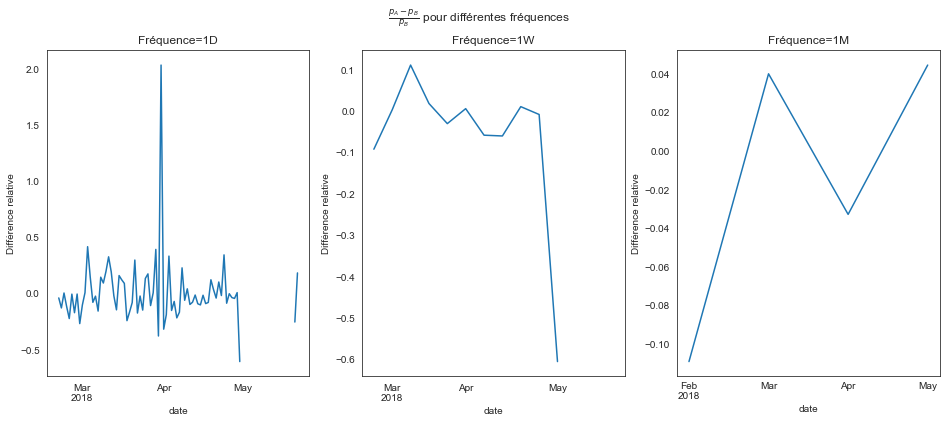

In [13]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

#### b. Pattern journalier, hebdomadaire, mensuel?

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [17]:
Z_cum, P_rej, p_cum = testZ_cum(data)

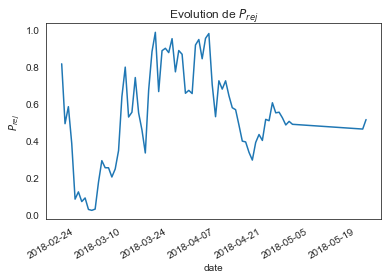

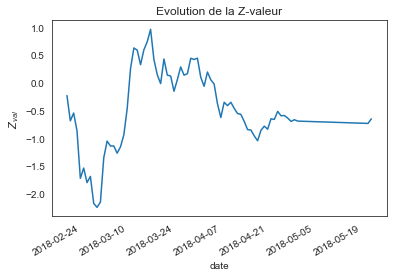

In [21]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

### 3. Évolution de la significativité du test

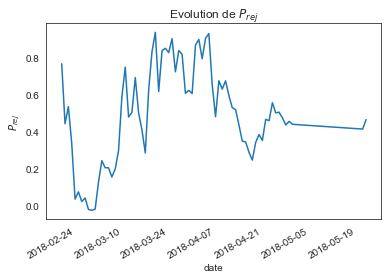

In [24]:
# p_value < 0.05, 0.01 

s = P_rej - 0.05
s.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()